# Getting Data: Working with APIs
Aug 13, 2020 

## Today

- Introduction to APIs
- Pulling data and shape files using Python
    - Example: Real-time earthquake over the world

## Introduction to APIs

Or, how to pull data from the web using Python

### Example APIs

- Socrata Open Data: https://dev.socrata.com/
- US Census Bureau: https://www.census.gov/data/developers/data-sets.html


- Google APIs: https://console.developers.google.com/apis/library?project=cp255-185021
- Facebook: https://developers.facebook.com/docs/apis-and-sdks/
- Twitter: https://developer.twitter.com/en/docs/api-reference-index.html

**Note**: when accessing data via API, many services will require you to register an API key to prevent you from overloading the service with requests

## Reading an automated data feed

USGS real-time earthquake feeds
This is an API for near-real-time data about earthquakes, and data is provided in GeoJSON format over the web.

The API has a separate endpoint for each version of the data that users might want. No authentication is required.

API documentation:

http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

Sample API endpoint, for magnitude 4.5+ earthquakes in past day:

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson

#### GeoPandas can read GeoJSON from the web directly

Simply pass the URL to the `gpd.read_file()` function:

In [10]:
import geopandas as gpd
import pandas as pd

In [36]:
# download data on magnitude 4.5+ quakes from the past week
endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.geojson"
df = gpd.read_file(endpoint_url)

In [41]:
df.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,us6000behm,4.8,south of Tonga,1597361670357,1597363537040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,7.057,1.08,96.0,mb,earthquake,M 4.8 - south of Tonga,POINT Z (-175.32960 -24.05530 10.00000)
1,us6000be84,4.8,"19 km SE of Obigarm, Tajikistan",1597342035934,1597343188040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,0.544,1.04,73.0,mb,earthquake,"M 4.8 - 19 km SE of Obigarm, Tajikistan",POINT Z (69.84650 38.58040 7.57000)
2,us6000be7p,4.6,"143 km SSW of Lotofagā, Samoa",1597340175363,1597347919040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",NaN,1.387,0.78,113.0,mb,earthquake,"M 4.6 - 143 km SSW of Lotofagā, Samoa",POINT Z (-172.56400 -15.07840 10.00000)
3,us6000be26,5.0,Tanzania,1597330494139,1597339972063,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,9.0,2.6,...,",us,",",dyfi,origin,phase-data,",NaN,11.655,1.16,119.0,mww,earthquake,M 5.0 - Tanzania,POINT Z (39.89240 -7.39120 10.00000)
4,us6000bduv,5.7,"Unimak Island region, Alaska",1597300798034,1597366201875,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",at,us,ak,",",ground-failure,impact-link,losspager,moment-t...",NaN,1.374,0.86,119.0,mww,earthquake,"M 5.7 - Unimak Island region, Alaska",POINT Z (-163.69730 53.42000 10.43000)


## Let's plot them on a map:

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

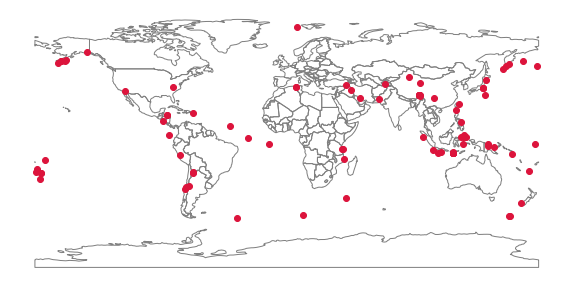

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

# plot the country outline
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.to_crs(epsg=4326).plot(ax=ax, facecolor="none", edgecolor="gray")

# plot the earthquakes
df.to_crs(epsg=4326).plot(ax=ax, color="crimson")

ax.set_axis_off()